# Norm and Weight Decay

In [17]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [18]:
class Data(d2l.DataModule):
    """
    @num_val: Is the number of examples for training set
    @num_val: Is number of examples for validation set
    @num_inputs: Total size of examples
    """

    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

## Using L2 Regularization

In [19]:
def l2_penalty(w):
    """L2 norm"""
    return (w**2).sum() / 2

In [20]:
class WeightDecayScratch(d2l.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return super().loss(y_hat, y) + self.lambd * l2_penalty(self.w)

In [21]:
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)


def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale = "log"
    trainer.fit(model, data)
    print("L2 norm of w:", float(l2_penalty(model.w)))

L2 norm of w: 0.01075059175491333


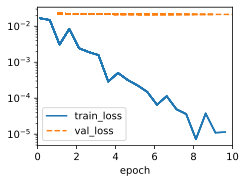

In [22]:
# Without weight decay
train_scratch(lambd=0)
# notice that as training_loss reduces, validation loss does not

L2 norm of w: 0.0028542731888592243


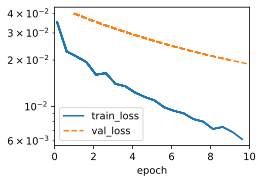

In [23]:
train_scratch(2)


In [24]:
class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd

    def configure_optimizers(self):
        return torch.optim.SGD(
            [
                {"params": self.net.weight, "weight_decay": self.wd},
                {"params": self.net.bias},
            ],
            lr=self.lr,
        )

L2 norm of w: 0.013924829661846161


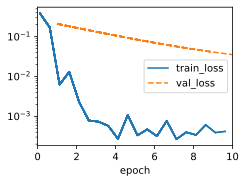

In [25]:
model = WeightDecay(wd=3, lr=0.01)
model.board.yscale='log'
trainer.fit(model, data)

print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))
